# Vila Moema Reference Station Data - Diamante Energia

## Load data from file

In [14]:
import pandas as pd

air_quality_data = pd.read_csv("input/air-quality-reference-data-Diamante/Qar_VilaMoema_Jan22_a_Fev23.csv",
                    decimal=',', sep=';', skiprows=[1,2,3])
air_quality_data['DateTime'] = (pd.to_datetime(air_quality_data['Data e Hora'], infer_datetime_format=False, format='%d/%m/%Y %H:%M:%S'))
air_quality_data = (air_quality_data.sort_values(by='DateTime', ascending=True).reset_index().drop(columns=['index','Data e Hora']))
air_quality_data.index = air_quality_data['DateTime']
air_quality_data = air_quality_data.drop(columns='DateTime')

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_56256/3527439713.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  air_quality_data['DateTime'] = (pd.to_datetime(air_quality_data['Data e Hora'], infer_datetime_format=False, format='%d/%m/%Y %H:%M:%S'))


In [15]:
air_quality_data

,Partículas Totais em Suspensão,Material Particulado <10µm,Óxidos de Nitrogênio,Dióxido de Nitrogênio,Dióxido de Enxofre,Monóxido de Nitrogênio,Ozônio,Material Particulado <2.5µm,Monóxido de Carbono
DateTime,,,,,,,,,
2022-01-01 02:30:00,40.0,31.0,4.63,4.02,4.46,0.61,13.23,9.0,0.1467
2022-01-01 03:30:00,43.0,37.0,5.31,4.38,4.33,0.93,12.07,15.0,0.1544
2022-01-01 04:30:00,32.0,22.0,9.77,8.66,4.48,1.11,13.24,9.0,0.1167
2022-01-01 05:30:00,22.0,16.0,9.91,8.57,4.44,1.34,14.42,8.0,0.1079
2022-01-01 06:30:00,27.0,16.0,9.88,8.10,4.58,1.78,13.30,5.0,0.1154
...,...,...,...,...,...,...,...,...,...
2023-02-08 12:30:00,38.0,31.0,35.59,25.29,61.08,10.31,50.01,12.0,0.0990
2023-02-08 13:30:00,34.0,26.0,13.94,9.65,18.45,4.30,67.43,7.0,0.0892
2023-02-08 14:30:00,44.0,25.0,11.87,7.76,13.42,4.10,72.46,8.0,0.0893


## Plot data

<Axes: xlabel='DateTime'>

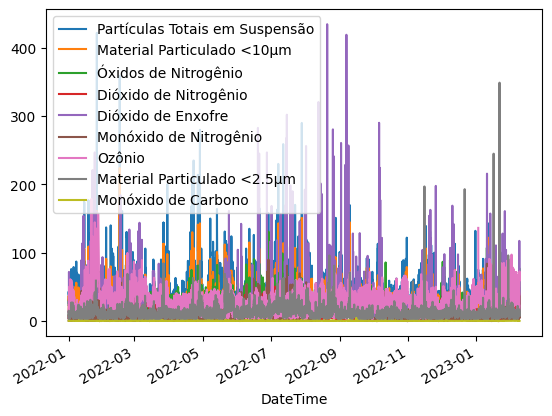

In [16]:
air_quality_data.plot()

## Save Data

In [17]:
air_quality_data.to_csv('output/ref_air_quality_data_Vila_Moema.csv')
air_quality_data.to_csv('../data-processing/input/ref_air_quality_data_Vila_Moema.csv')

## CO Data

,value,measuring,Diff,Max Diff,Hour
DateTime,,,,,
2022-01-01 02:30:00,0.1467,146.7,NaN,4295.4,2
2022-01-01 03:30:00,0.1544,154.4,7.7,4295.4,3
2022-01-01 04:30:00,0.1167,116.7,-37.7,4295.4,4
2022-01-01 05:30:00,0.1079,107.9,-8.8,4295.4,5
2022-01-01 06:30:00,0.1154,115.4,7.5,4295.4,6


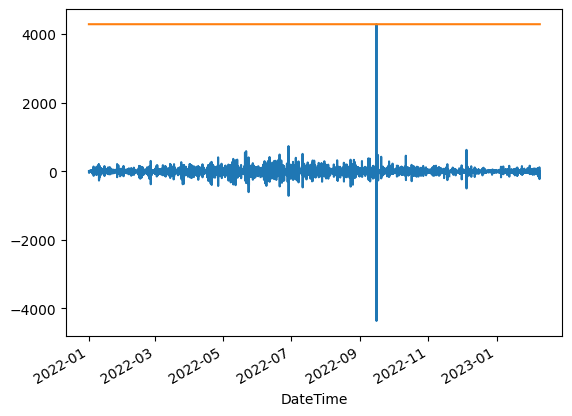

In [18]:
co_data = pd.DataFrame()
co_data['value'] = air_quality_data['Monóxido de Carbono'] # ppm
co_data['measuring'] = co_data['value'].map(lambda v: v * 1e3) # ppb
co_data['Diff'] = co_data['measuring'].diff() # ppb
co_data['Max Diff'] = co_data['Diff'].max()
co_data['Diff'].plot()
co_data['Max Diff'].plot()
co_data['Hour'] = co_data.index.hour
co_data.head()

(0.09000000000000001, 4852.540000000001)

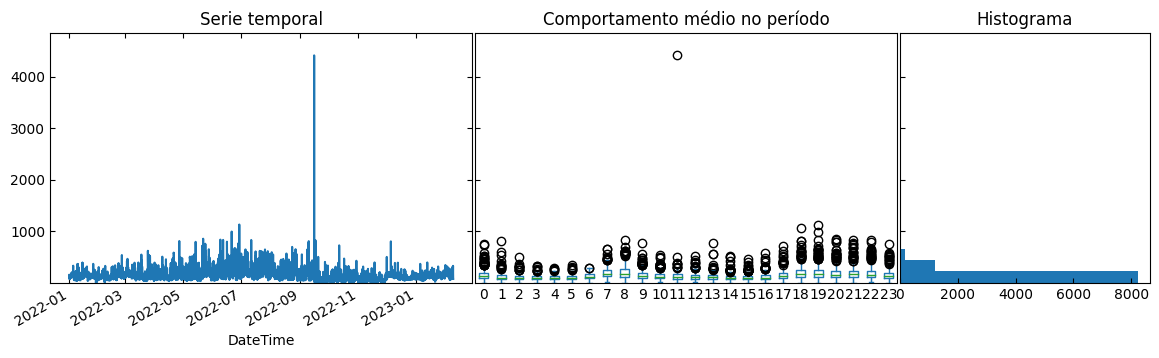

In [19]:
import matplotlib.pyplot as plt

df = co_data
bins = 20

bottom, height = 0.1, 0.65
left, width = bottom, height*1.3
spacing = 0.005

rect_ser = [left-width-spacing, bottom, width, height]
rect_box = [left, bottom, width, height]
rect_hist = [left + width + spacing, bottom, height/1.3, height]

plt.figure(figsize=(5, 5/1.3))

ax_ser  = plt.axes(rect_ser)
ax_ser.tick_params(direction='in', top=True, right=True)
ax_ser.set_title('Serie temporal')

ax_box  = plt.axes(rect_box)
ax_box.tick_params(direction='in', labelleft=False)

ax_hist = plt.axes(rect_hist)
ax_hist.tick_params(direction='in', labelleft=False)
ax_hist.set_title('Histograma')

lim_max = df['measuring'].max()+df['measuring'].max()*10/100
lim_min = df['measuring'].min()-df['measuring'].min()*10/100

df['measuring'].plot(ax=ax_ser)
ax_ser.set_ylim(lim_min, lim_max)

ax_hist.hist(df['measuring'], bins=bins, orientation='horizontal')
ax_hist.set_ylim(lim_min, lim_max)

df = df.dropna(axis='index', how='all', subset=['Hour'])
df['Hour'] = df['Hour'].astype('int64')
df.pivot(columns='Hour')['measuring'].dropna(
        axis='columns', how='all').plot.box(
            ax=ax_box,title='Comportamento médio no período')
ax_box.set_ylim(ax_hist.get_ylim())

## NO2 Data

,value,measuring,Diff,Max Diff,Hour
DateTime,,,,,
2022-01-01 02:30:00,4.02,2.136451,NaN,30.271707,2
2022-01-01 03:30:00,4.38,2.327775,0.191324,30.271707,3
2022-01-01 04:30:00,8.66,4.602405,2.274630,30.271707,4
2022-01-01 05:30:00,8.57,4.554574,-0.047831,30.271707,5
2022-01-01 06:30:00,8.10,4.304790,-0.249784,30.271707,6


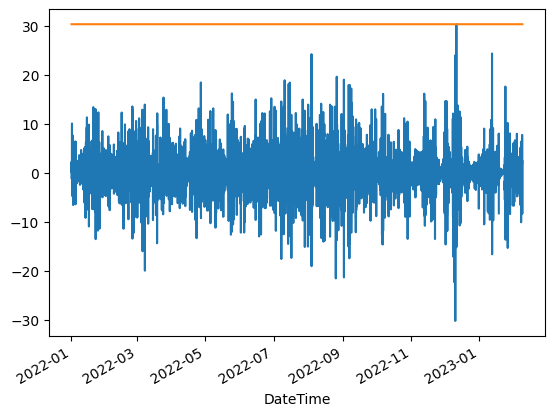

In [20]:
molar_mass = 46.0055
no2_data = pd.DataFrame()
no2_data['value'] = air_quality_data['Dióxido de Nitrogênio']
no2_data['measuring'] = no2_data['value'].map(lambda v: v / (0.0409 * molar_mass))
no2_data['Diff'] = no2_data['measuring'].diff()
no2_data['Max Diff'] = no2_data['Diff'].max()
no2_data['Diff'].plot()
no2_data['Max Diff'].plot()
no2_data['Hour'] = no2_data.index.hour
no2_data.head()

(0.014349299524328693, 58.76410174089156)

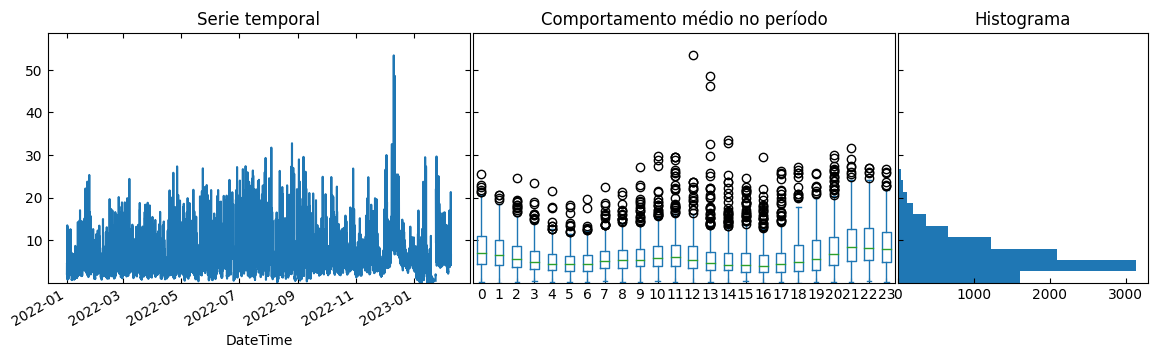

In [21]:
import matplotlib.pyplot as plt

df = no2_data
bins = 20

bottom, height = 0.1, 0.65
left, width = bottom, height*1.3
spacing = 0.005

rect_ser = [left-width-spacing, bottom, width, height]
rect_box = [left, bottom, width, height]
rect_hist = [left + width + spacing, bottom, height/1.3, height]

plt.figure(figsize=(5, 5/1.3))

ax_ser  = plt.axes(rect_ser)
ax_ser.tick_params(direction='in', top=True, right=True)
ax_ser.set_title('Serie temporal')

ax_box  = plt.axes(rect_box)
ax_box.tick_params(direction='in', labelleft=False)

ax_hist = plt.axes(rect_hist)
ax_hist.tick_params(direction='in', labelleft=False)
ax_hist.set_title('Histograma')

lim_max = df['measuring'].max()+df['measuring'].max()*10/100
lim_min = df['measuring'].min()-df['measuring'].min()*10/100

df['measuring'].plot(ax=ax_ser)
ax_ser.set_ylim(lim_min, lim_max)

ax_hist.hist(df['measuring'], bins=bins, orientation='horizontal')
ax_hist.set_ylim(lim_min, lim_max)

df = df.dropna(axis='index', how='all', subset=['Hour'])
df['Hour'] = df['Hour'].astype('int64')
df.pivot(columns='Hour')['measuring'].dropna(
        axis='columns', how='all').plot.box(
            ax=ax_box,title='Comportamento médio no período')
ax_box.set_ylim(ax_hist.get_ylim())

## SO2 Data

,value,measuring,Diff,Max Diff,Hour
DateTime,,,,,
2022-01-01 02:30:00,4.46,2.370292,NaN,198.817517,2
2022-01-01 03:30:00,4.33,2.301202,-0.069089,198.817517,3
2022-01-01 04:30:00,4.48,2.380921,0.079718,198.817517,4
2022-01-01 05:30:00,4.44,2.359663,-0.021258,198.817517,5
2022-01-01 06:30:00,4.58,2.434066,0.074404,198.817517,6


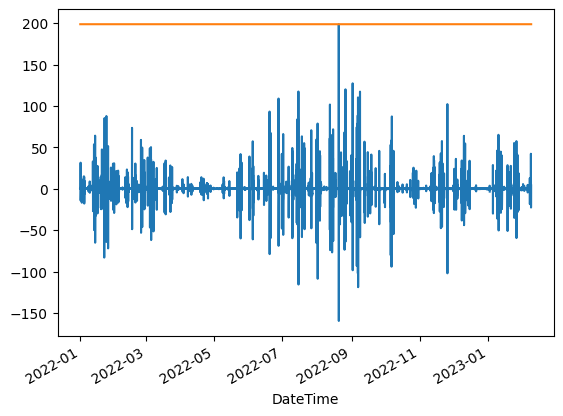

In [22]:
M = 64.066
so2_data = pd.DataFrame()
so2_data['value'] = air_quality_data['Dióxido de Enxofre']
so2_data['measuring'] = so2_data['value'].map(lambda v: v / (0.0409 * molar_mass))
so2_data['Diff'] = so2_data['measuring'].diff()
so2_data['Max Diff'] = so2_data['Diff'].max()
so2_data['Diff'].plot()
so2_data['Max Diff'].plot()
so2_data['Hour'] = so2_data.index.hour
so2_data.head()

(0.0, 254.0793264885226)

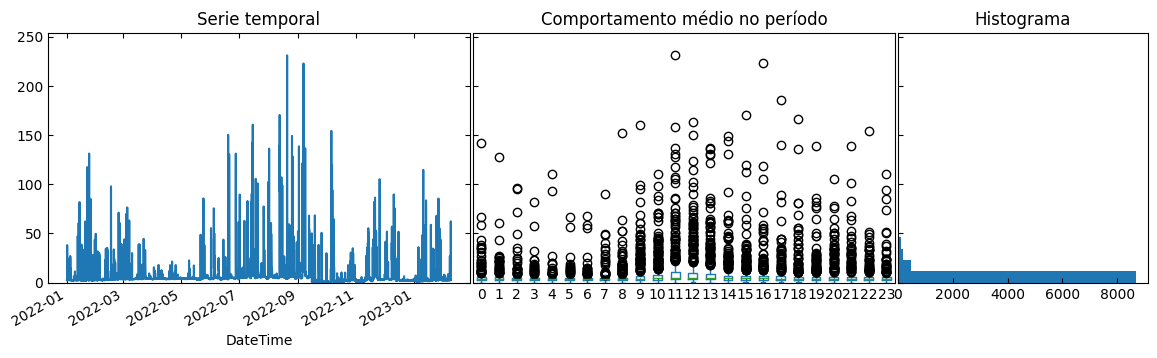

In [23]:
import matplotlib.pyplot as plt

df = so2_data
bins = 20

bottom, height = 0.1, 0.65
left, width = bottom, height*1.3
spacing = 0.005

rect_ser = [left-width-spacing, bottom, width, height]
rect_box = [left, bottom, width, height]
rect_hist = [left + width + spacing, bottom, height/1.3, height]

plt.figure(figsize=(5, 5/1.3))

ax_ser  = plt.axes(rect_ser)
ax_ser.tick_params(direction='in', top=True, right=True)
ax_ser.set_title('Serie temporal')

ax_box  = plt.axes(rect_box)
ax_box.tick_params(direction='in', labelleft=False)

ax_hist = plt.axes(rect_hist)
ax_hist.tick_params(direction='in', labelleft=False)
ax_hist.set_title('Histograma')

lim_max = df['measuring'].max()+df['measuring'].max()*10/100
lim_min = df['measuring'].min()-df['measuring'].min()*10/100

df['measuring'].plot(ax=ax_ser)
ax_ser.set_ylim(lim_min, lim_max)

ax_hist.hist(df['measuring'], bins=bins, orientation='horizontal')
ax_hist.set_ylim(lim_min, lim_max)

df = df.dropna(axis='index', how='all', subset=['Hour'])
df['Hour'] = df['Hour'].astype('int64')
df.pivot(columns='Hour')['measuring'].dropna(
        axis='columns', how='all').plot.box(
            ax=ax_box,title='Comportamento médio no período')
ax_box.set_ylim(ax_hist.get_ylim())

## O3 Data

,value,measuring,Diff,Max Diff,Min Diff,Hour
DateTime,,,,,,
2022-01-01 02:30:00,13.23,7.031157,NaN,27.332758,-45.104632,2
2022-01-01 03:30:00,12.07,6.414668,-0.616488,27.332758,-45.104632,3
2022-01-01 04:30:00,13.24,7.036471,0.621803,27.332758,-45.104632,4
2022-01-01 05:30:00,14.42,7.663589,0.627118,27.332758,-45.104632,5
2022-01-01 06:30:00,13.30,7.068359,-0.595230,27.332758,-45.104632,6


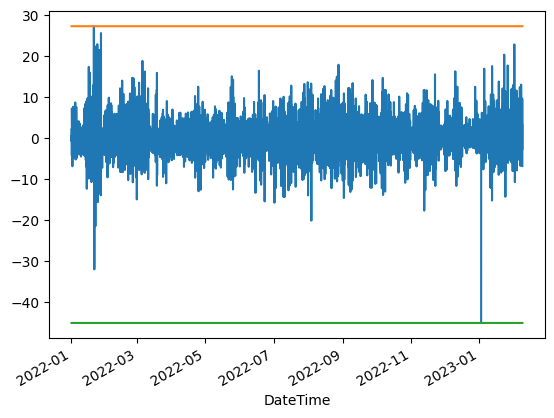

In [24]:
M = 48
o3_data = pd.DataFrame()
o3_data['value'] = air_quality_data['Ozônio']
o3_data['measuring'] = o3_data['value'].map(lambda v: v / (0.0409 * molar_mass))
o3_data['Diff'] = o3_data['measuring'].diff()
o3_data['Max Diff'] = o3_data['Diff'].max()
o3_data['Min Diff'] = o3_data['Diff'].min()
o3_data['Diff'].plot()
o3_data['Max Diff'].plot()
o3_data['Min Diff'].plot()
o3_data['Hour'] = o3_data.index.hour
o3_data.head()

(0.9374875689228078, 104.45652307065762)

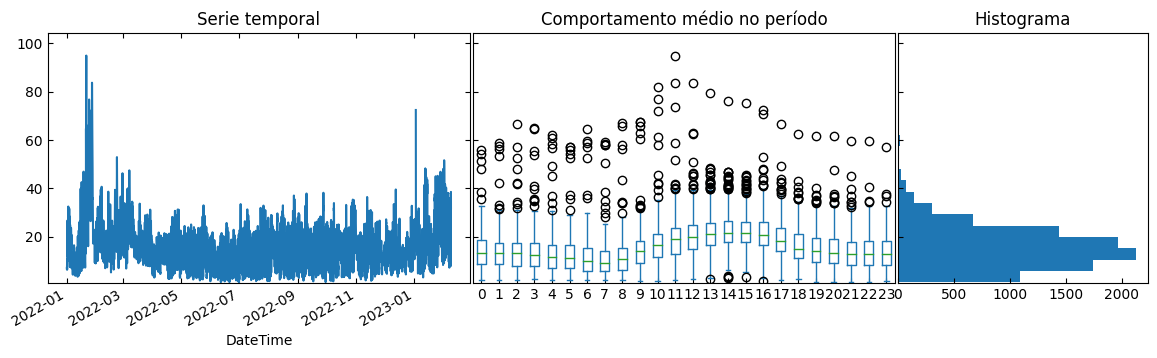

In [25]:
import matplotlib.pyplot as plt

df = o3_data
bins = 20

bottom, height = 0.1, 0.65
left, width = bottom, height*1.3
spacing = 0.005

rect_ser = [left-width-spacing, bottom, width, height]
rect_box = [left, bottom, width, height]
rect_hist = [left + width + spacing, bottom, height/1.3, height]

plt.figure(figsize=(5, 5/1.3))

ax_ser  = plt.axes(rect_ser)
ax_ser.tick_params(direction='in', top=True, right=True)
ax_ser.set_title('Serie temporal')

ax_box  = plt.axes(rect_box)
ax_box.tick_params(direction='in', labelleft=False)

ax_hist = plt.axes(rect_hist)
ax_hist.tick_params(direction='in', labelleft=False)
ax_hist.set_title('Histograma')

lim_max = df['measuring'].max()+df['measuring'].max()*10/100
lim_min = df['measuring'].min()-df['measuring'].min()*10/100

df['measuring'].plot(ax=ax_ser)
ax_ser.set_ylim(lim_min, lim_max)

ax_hist.hist(df['measuring'], bins=bins, orientation='horizontal')
ax_hist.set_ylim(lim_min, lim_max)

df = df.dropna(axis='index', how='all', subset=['Hour'])
df['Hour'] = df['Hour'].astype('int64')
df.pivot(columns='Hour')['measuring'].dropna(
        axis='columns', how='all').plot.box(
            ax=ax_box,title='Comportamento médio no período')
ax_box.set_ylim(ax_hist.get_ylim())

## PM10 Data

,measuring,Diff,Max Diff,Min Diff,Hour
DateTime,,,,,
2022-01-01 02:30:00,31.0,NaN,152.0,-126.0,2
2022-01-01 03:30:00,37.0,6.0,152.0,-126.0,3
2022-01-01 04:30:00,22.0,-15.0,152.0,-126.0,4
2022-01-01 05:30:00,16.0,-6.0,152.0,-126.0,5
2022-01-01 06:30:00,16.0,0.0,152.0,-126.0,6


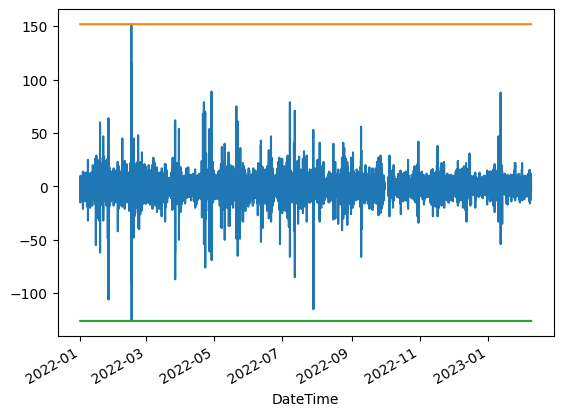

In [26]:
pm10_data = pd.DataFrame()
pm10_data['measuring'] = air_quality_data['Material Particulado <10µm']
pm10_data['Diff'] = pm10_data['measuring'].diff()
pm10_data['Max Diff'] = pm10_data['Diff'].max()
pm10_data['Min Diff'] = pm10_data['Diff'].min()
pm10_data['Diff'].plot()
pm10_data['Max Diff'].plot()
pm10_data['Min Diff'].plot()
pm10_data['Hour'] = pm10_data.index.hour
pm10_data.head()

(0.9374875689228078, 104.45652307065762)

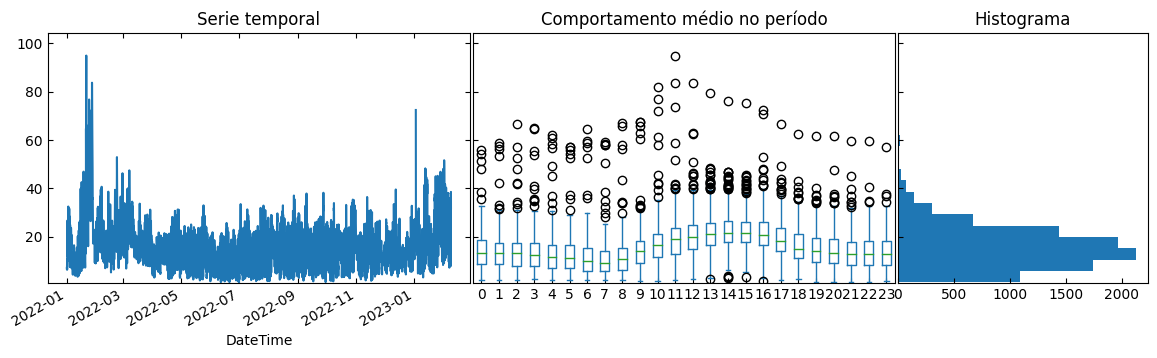

In [15]:
import matplotlib.pyplot as plt

df = o3_data
bins = 20

bottom, height = 0.1, 0.65
left, width = bottom, height*1.3
spacing = 0.005

rect_ser = [left-width-spacing, bottom, width, height]
rect_box = [left, bottom, width, height]
rect_hist = [left + width + spacing, bottom, height/1.3, height]

plt.figure(figsize=(5, 5/1.3))

ax_ser  = plt.axes(rect_ser)
ax_ser.tick_params(direction='in', top=True, right=True)
ax_ser.set_title('Serie temporal')

ax_box  = plt.axes(rect_box)
ax_box.tick_params(direction='in', labelleft=False)

ax_hist = plt.axes(rect_hist)
ax_hist.tick_params(direction='in', labelleft=False)
ax_hist.set_title('Histograma')

lim_max = df['measuring'].max()+df['measuring'].max()*10/100
lim_min = df['measuring'].min()-df['measuring'].min()*10/100

df['measuring'].plot(ax=ax_ser)
ax_ser.set_ylim(lim_min, lim_max)

ax_hist.hist(df['measuring'], bins=bins, orientation='horizontal')
ax_hist.set_ylim(lim_min, lim_max)

df = df.dropna(axis='index', how='all', subset=['Hour'])
df['Hour'] = df['Hour'].astype('int64')
df.pivot(columns='Hour')['measuring'].dropna(
        axis='columns', how='all').plot.box(
            ax=ax_box,title='Comportamento médio no período')
ax_box.set_ylim(ax_hist.get_ylim())